# Setup and Inspection

**Data Dictionary**

| Variable | Definition | Key |
| :----- | :----- | :----- |
|survival | Survival | 0 = No, 1 = Yes |
|pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
|sex | Sex |  |
|Age | Age in years |  |
|sibsp | # of siblings / spouses aboard the Titanic |  |
|parch | # of parents / children aboard the Titanic |  |
|ticket | Ticket number |  |
|fare | Passenger fare |  |
|cabin | Cabin number |  |
|embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
import os, glob
import math
from datetime import datetime
from datetime import timedelta
%matplotlib inline

# Plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import cufflinks as cf

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, make_pipeline  # Same, but with the latter it is not necessary to name estimator and transformer
#from imblearn.pipeline import Pipeline as Imb_Pipe
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, GenericUnivariateSelect, mutual_info_classif
#import eli5

# Predictive Modeling (Models)
from sklearn.dummy import DummyClassifier, DummyRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict, cross_val_score, cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, NuSVC, SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, PassiveAggressiveRegressor, ElasticNet, SGDRegressor, RANSACRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, VotingClassifier, RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBClassifier, XGBRegressor
from scipy.stats import randint
from sklearn.multiclass import OneVsRestClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, fbeta_score, accuracy_score, confusion_matrix, f1_score, precision_recall_curve, recall_score, precision_score, roc_auc_score
from scipy.sparse import csr_matrix
import scipy.stats as stats

# Neural Networks
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from keras.wrappers.scikit_learn import KerasRegressor
from IPython.display import SVG

In [2]:
# Notebook settings
target = "Survived"
scoring = "accuracy"
random_state = 42
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
pd.options.display.max_seq_items = 250

**Import train and test datasets**

In [3]:
# Import train dataset as DataFrame
data_raw = pd.read_csv("data/train.csv")

In [4]:
# Assign data_raw to data
data = data_raw.copy()
data.set_index('PassengerId', inplace=True)

In [5]:
# Import test dataset as DataFrame
X_test_raw = pd.read_csv("data/test.csv")

In [6]:
# Assign X_test_raw to X_test
X_test = X_test_raw.copy()
X_test.set_index('PassengerId', inplace=True)

**Inspect train dataset**

In [7]:
# Display shape of "data"
data.shape

(891, 11)

In [8]:
# Display head of "data"
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
data_raw.Ticket.value_counts()

CA. 2343       7
347082         7
1601           7
CA 2144        6
347088         6
              ..
W.E.P. 5734    1
113783         1
113028         1
383121         1
240929         1
Name: Ticket, Length: 681, dtype: int64

In [10]:
# Describe data (summary)
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


In [11]:
# List datatypes (data.info()) (pre-cleaning)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
# List unique entries per column
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [13]:
# List missing values (pre-cleaning)


def count_missing(data):
    null_cols = data.columns[data.isnull().any(axis=0)]
    X_null = data[null_cols].isnull().sum()
    X_null = X_null.sort_values(ascending=False)
    print(X_null)


count_missing(data)

Cabin       687
Age         177
Embarked      2
dtype: int64


# Data Cleaning

In [14]:
# Fill missing values
def cln_fill_missing_val(data):
    data.Cabin.fillna("none", inplace=True)
    data.Age.fillna(data.Age.median(), inplace=True)
    return data

In [15]:
# Remove columns with >10% missing values (in this case none were removed)
def cln_rem_cols(data):
#    data.drop("Cabin",inplace=True,axis=1)
#    for col in data.columns:
#        if data.col.isnull().sum() > data.shape[0]/10:
#            data.drop(col,inplace=True,axis=1)
    return data

In [16]:
# Remove rows with missing values
def cln_rem_rows(data):
    data.dropna(subset=["Embarked"],inplace=True)  
    return data

In [17]:
# Bundle data cleaning steps as function "data_cleaning"
def data_cleaning(data):
    data = cln_fill_missing_val(data)
    data = cln_rem_cols(data)
    data = cln_rem_rows(data)
    
    return data

In [18]:
data.dropna(subset=["Embarked"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [19]:
# Apply data cleaning to dataset
data = data_cleaning(data)
data_clean = data.copy()

In [20]:
# Assign data_clean to data
data = data_clean.copy()

# EDA

In [21]:
# Histogram of price_log
fig = px.histogram(
    data,
    x="Survived",
    title="Survived Histogram",
    #             color="host_is_superhost",
    nbins=50)

fig.show()

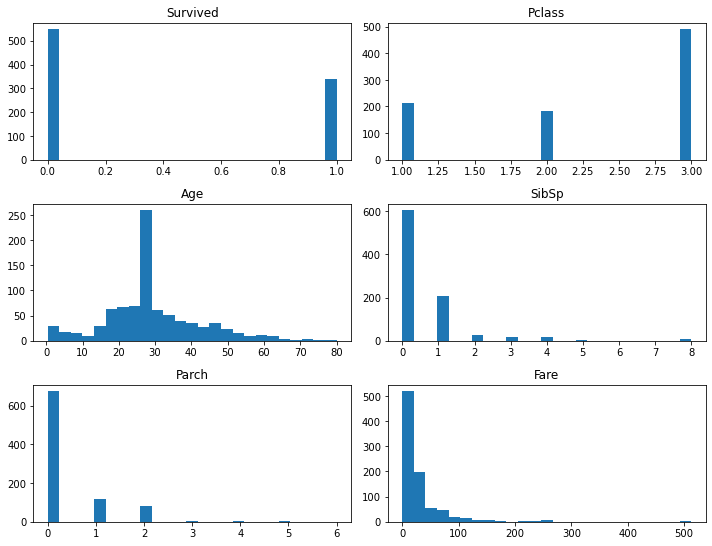

In [22]:
# Histogram of features
data.hist(figsize=(10, 15),
          bins=25,
          layout=(int(len(data.columns) / 2) + 1, 2),
          grid=False)
plt.tight_layout()

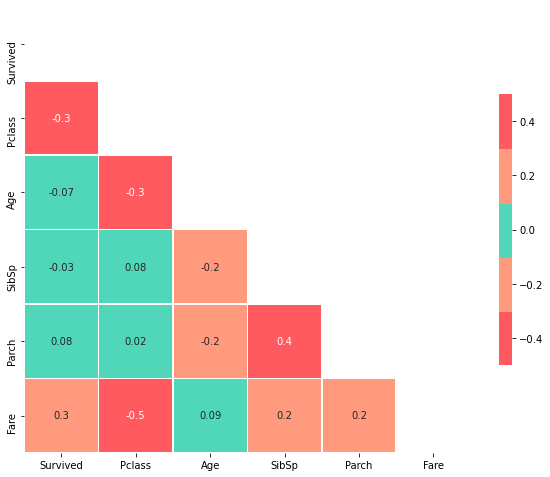

In [23]:
# Correlation heatmap
#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(),
            mask=mask,
            cmap=["#FF5A5F", "#FF9A7F", "#50D6B9", "#FF9A7F", "#FF5A5F"],
            vmax=.5,
            vmin=-.5,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True,
            fmt=".1g");

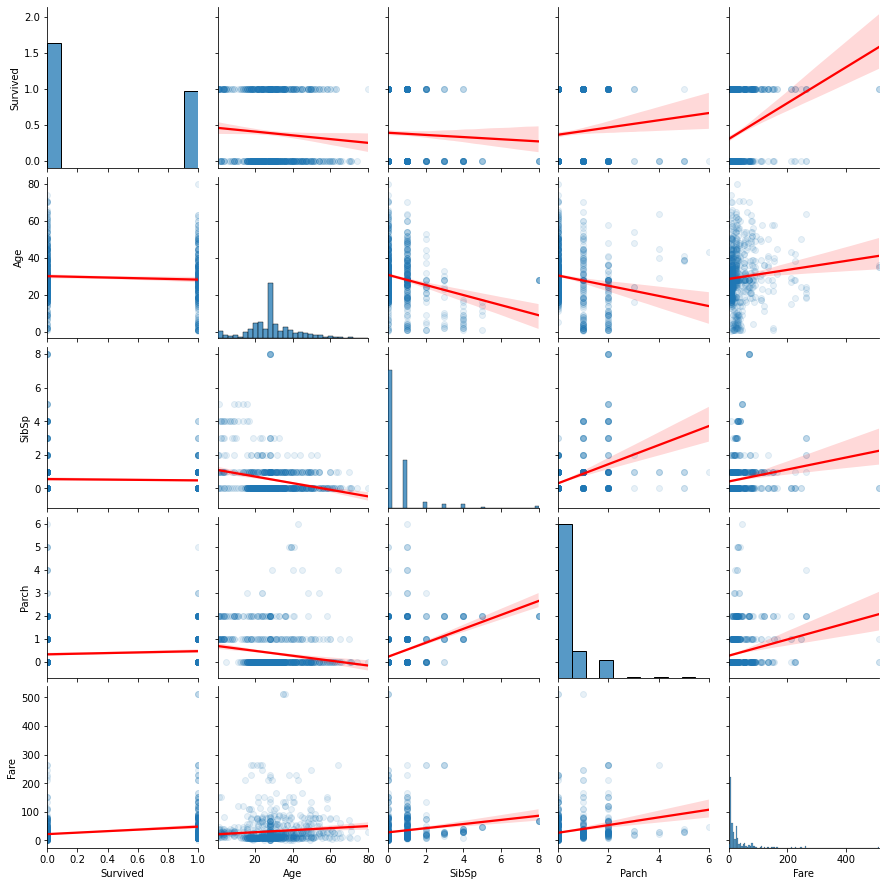

In [24]:
# Plot all variables as pairplot
sns.pairplot(data,
             kind="reg",
             vars=["Survived", "Age", "SibSp", "Parch", "Fare"],
             plot_kws={
                 'line_kws': {
                     'color': 'red'
                 },
                 'scatter_kws': {
                     'alpha': 0.1
                 }
             });

# Feature Engineering

In [25]:
# Create numerical features
def feat_num(data):
    # Create "Ticket_count" to calculate people on same ticket
    ticket_count = dict()
    temp_df = pd.concat([data, X_test], sort=False)
    for i in temp_df.Ticket:
        ticket_count[i] = ticket_count.get(i, 0) + 1
    data["Ticket_count"] = [ticket_count[i] for i in data.Ticket]
    
    # Re-calculate "Fare" based on "Ticket_count" NOTE: This would not be possible in a real setting as it assumes we know Ticket of X_test beforehand
    data.Fare = data.Fare / data.Ticket_count
    
    # Create "Ticket_len" to calculate length of ticket number
    data["Ticket_len"] = [len(el) for el in data.Ticket]
    
    # Create "Family" to count total number of family members
    data["Family"] = data.SibSp + data.Parch
    
    return data

In [26]:
# Create categorical features
def feat_cat(data):
    # Convert "Pclass" to categorical
    data['Pclass'] = data['Pclass'].astype(str)
    
    # Create "Title" from "Name"
    data["Title"] = [el.split(", ")[1].split(" ")[0].strip(".") for el in data.Name]
    data.Title.replace(
        ["Col", "Mlle", "Major", "Capt", "Ms", "Mme"],
        ["Duty", "Miss", "Duty", "Duty", "Miss", "Mrs"],
        inplace=True)
    for idx in data.index:
        if data.Title[idx] not in ["Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Duty"]:
            data.Title[idx] = "Other"
            
    # Extract cabin category from "Cabin"
    data.Cabin = [i[0].upper() for i in data.Cabin]
    for idx in data.index:
        if data.Cabin[idx] not in ["A", "B", "C", "D", "E", "F", "N"]:
            data.Cabin[idx] = "Other"
            
    return data

In [27]:
# Create binary features (1/0)
def feat_binary(data):
    # Convert "Sex" from "female/male" to "1/0"
    data.Sex.replace(["female", "male"], [1, 0], inplace=True)
#    data.Cabin = np.where(data.Cabin == "none", 0, 1)
    
    # Create column to designate whether passenger is child (i.e. under 18)
    data["is_child"] = np.where(data.Age < 18, 1, 0)
    
    # Create column to designate whether passenger is married woman
    data["is_married_female"] = np.where(data.Title == "Mrs", 1, 0)
    
    return data

In [28]:
# Remove columns not needed for predictive modeling
def feat_rem_cols(data):
    data.drop(["Name", "Ticket", "Ticket_count", "SibSp", "Parch"],inplace=True,axis=1)
    
    return data

In [29]:
# Bundle feature engineering steps as function "feature_engineering"
def feature_engineering(data):
    data = feat_num(data)
    data = feat_cat(data)
    data = feat_binary(data)
    data = feat_rem_cols(data)
    return data

In [30]:
data = data_clean.copy()

In [31]:
# Apply feature engineering to dataset
data = feature_engineering(data)

In [32]:
# Save data as data_engineered
data_engineered = data.copy()

# Preprocessing

In [33]:
# Create list for categorical predictors/features (used in "Scaling with Preprocessing Pipeline")
cat_features = list(data.columns[data.dtypes == object])
#cat_features.remove("neighbourhood")
#cat_features.remove("zipcode")
cat_features

['Pclass', 'Cabin', 'Embarked', 'Title']

In [34]:
# Create list for numerical predictors/features (removing target column, used in "Scaling with Preprocessing Pipeline")
num_features = list(data.columns[data.dtypes != object])
num_features.remove(target)
num_features

['Sex', 'Age', 'Fare', 'Ticket_len', 'Family', 'is_child', 'is_married_female']

In [35]:
# Build preprocessor pipeline
# Pipeline for numerical features
num_pipeline = Pipeline([('imputer_num', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler())])

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')),
    ('1hot', OneHotEncoder(drop='first', handle_unknown='error'))
])

# Complete pipeline
preprocessor = ColumnTransformer([('num', num_pipeline, num_features),
                                  ('cat', cat_pipeline, cat_features)])

In [36]:
# Separate X_train and y_train
X_train = data.drop([target], axis=1)
y_train = data[target]

In [37]:
# Preprocess X_train and X_test
X_train_prep_preprocessor = preprocessor.fit(X_train)
X_train_prep = X_train_prep_preprocessor.transform(X_train)

In [38]:
# Apply preprocessing functions and pipeline to X_test dataset
data_cleaning(X_test)
feature_engineering(X_test)
X_test_prep = X_train_prep_preprocessor.transform(X_test)

In [39]:
# Get feature names from pipeline after one-hot encoding as "column_names"
onehot_columns = list(preprocessor.named_transformers_['cat']['1hot'].get_feature_names(cat_features))
column_names = num_features + onehot_columns

# Predictive Modeling

In [40]:
# "get_feat_importances": Function for retrieving feature importances
def get_feat_importances(model, column_names=column_names):
    model=model
    feat_importances = pd.DataFrame(model.feature_importances_,
                 columns=['weight'],
                 index=column_names)
    feat_importances.sort_values('weight', inplace=True, ascending=False)
    return feat_importances

In [41]:
# "model_eval": Function for final evaluation of "best model"
def model_eval(y, y_pred):
    print("Accuracy: {:.2f}".format(accuracy_score(y, y_pred)))
    print("Recall: {:.2f}".format(recall_score(y, y_pred)))
    print("Precision: {:.2f}".format(precision_score(y, y_pred)))
    print("F1 Score: {:.2f}".format(f1_score(y, y_pred)))
    print("ROC/AUC: {:.2f}".format(roc_auc_score(y, y_pred)))
    print("Confusion Matrix: \n" + str(confusion_matrix(y, y_pred)))

In [42]:
# "clf_learning_curves": Function to evaluate classification model based on learning curves
def clf_learning_curves(model):
# Fit model on training data
    model = model
    eval_set = [(X_train_prep, y_train), (X_test_prep, y_test)]
    model.fit(X_train_prep, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

    # Make predictions for test data
    y_pred = model.predict(X_test_prep)
    predictions = [round(value) for value in y_pred]

    # Evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # Retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    
    # Plot log loss
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    pyplot.ylabel('Log Loss')
    pyplot.title('XGBoost Log Loss')
    pyplot.show()
    
    # Plot classification error
    fig, ax = pyplot.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()

## Apply standard classification models

In [43]:
# Select models for comparison
clf_models = {
    'Baseline':
    DummyClassifier(strategy='most_frequent'),
    'LogReg':
    LogisticRegression(max_iter=1000),
    'KNN':
    KNeighborsClassifier(),
    'SVC':
    SVC(kernel='rbf', C=1E6),
    'Decision Tree':
    DecisionTreeClassifier(criterion="gini",
                           max_depth=3,
                           random_state=random_state),
    'Random Forest':
    RandomForestClassifier(random_state=random_state,
                           max_features='sqrt',
                           n_jobs=-1),
    'Gradient Boost':
    GradientBoostingClassifier(random_state=random_state),
    'XGBoost':
    XGBClassifier(),
    'AdaBoost':
    AdaBoostClassifier(random_state=random_state)
#    'CatBoost':
#    CatBoostClassifier()
}

In [44]:
# Calculate and display results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC/AUC'])
i = 0
for m in clf_models.items():
    # Building a full pipeline with our preprocessor and a Classifier
    pipe = Pipeline([('preprocessor', preprocessor), (m[0], m[1])])
    # Making predictions on the training set using cross validation as well as calculating the probabilities
    y_train_pred = cross_val_predict(pipe,
                                     X_train,
                                     y_train.values.ravel(),
                                     cv=5,
                                     verbose=4,
                                     n_jobs=-1)
    # Calculating metrices
    temp = pd.DataFrame(
        {
            'Model': m[0],
            'Accuracy': accuracy_score(y_train, y_train_pred),
            'Recall': recall_score(y_train, y_train_pred, average="weighted"),
            'Precision': precision_score(
                y_train, y_train_pred, average="weighted"),
            'F1 Score': f1_score(y_train, y_train_pred, average="weighted"),
            'ROC/AUC': roc_auc_score(y_train, y_train_pred)
        },
        index=[i])
    print(f"Confusion Matrix {m[0]}: \n" +
          str(confusion_matrix(y_train, y_train_pred)))
    i += 1
    results = pd.concat([results, temp])
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.4s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Confusion Matrix Baseline: 
[[549   0]
 [340   0]]
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Confusion Matrix LogReg: 
[[480  69]
 [ 82 258]]
Confusion Matrix KNN: 
[[482  67]
 [ 91 249]]
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.3s remaining:   18.4s
[Parallel(n_j

,Model,Accuracy,Recall,Precision,F1 Score,ROC/AUC
0,Baseline,0.617548,0.617548,0.381365,0.471535,0.500000
1,LogReg,0.830146,0.830146,0.829194,0.829485,0.816570
2,KNN,0.822272,0.822272,0.820836,0.820922,0.805156
3,SVC,0.746907,0.746907,0.745490,0.746081,0.729021
4,Decision Tree,0.814398,0.814398,0.813000,0.813309,0.798221
5,Random Forest,0.821147,0.821147,0.819673,0.819725,0.803686
6,Gradient Boost,0.840270,0.840270,0.839294,0.838465,0.821408
7,XGBoost,0.826772,0.826772,0.825412,0.825456,0.809919
8,AdaBoost,0.820022,0.820022,0.819827,0.819921,0.808933


## Model 1: Logistic regression

In [45]:
# Create pipeline to use in RandomizedSearchCV (opt. GridSearchCV)
pipeline_lr = Pipeline([('preprocessor', preprocessor),
                            ('lr',
                             LogisticRegression(penalty='l2',
                                                max_iter=39,
                                                C=0.02,
                                                random_state=random_state,
                                                l1_ratio=0.3,
                                                n_jobs=-1))])

**RandomizedSearchCV**

In [46]:
# Define hyperparameter distribution
param_distribs_lr = {
    'lr__penalty': ['l1', 'l2'],
    'lr__max_iter': randint(low=10, high=100),
    'lr__C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
    'lr__l1_ratio': [None, 0.1, 0.2, 0.3, 0.5, 0.9, 1]
}

In [47]:
# Create and fit RandomizedSearchCV, save "best_model"
rnd_lr = RandomizedSearchCV(pipeline_lr,
                                 param_distribs_lr,
                                 cv=5,
                                 scoring=scoring,
                                 n_iter=30,
                                 return_train_score=True,
                                 verbose=4,
                                 n_jobs=-1,
                                 random_state=random_state)

rnd_lr = rnd_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [48]:
# Save best model
best_model_rnd_lr = rnd_lr.best_estimator_["lr"]

In [49]:
# Display best_score_, best_params_ and best_estimator_
print('Best score:\n{:.2f}'.format(rnd_lr.best_score_))
print("Best parameters:\n{}".format(rnd_lr.best_params_))

Best score:
0.83
Best parameters:
{'lr__C': 1, 'lr__l1_ratio': 0.9, 'lr__max_iter': 96, 'lr__penalty': 'l2'}


**Feature importances**

In [50]:
# Get and print feature importances
#grid_lr_fi = feat_importances(grid_lr, cv_model=True, named_steps='lr', column_names=column_names)
#grid_lr_fi

**Full evaluation scores**

In [51]:
# Predict target with "best model"
y_train_pred_lr = best_model_rnd_lr.predict(X_train_prep)

In [52]:
# Full evaluation of "best model"
model_eval(y_train, y_train_pred_lr)

Accuracy: 0.83
Recall: 0.76
Precision: 0.79
F1 Score: 0.78
ROC/AUC: 0.82
Confusion Matrix: 
[[482  67]
 [ 81 259]]


## Model 2: XGBoost

In [53]:
# Create pipeline to use in RandomizedSearchCV and GridSearchCV
pipeline_xgb = Pipeline([('preprocessor', preprocessor),
                             ('xgb',
                              XGBClassifier(n_estimators=141,
                                            bootstrap=True,
                                            gamma=0.4,
                                            learning_rate=0.35,
                                            max_depth=3,
                                            max_features=18,
                                            random_state=random_state,
                                            scoring=scoring,
                                            n_jobs=-1))])

**RandomizedSearchCV**

In [54]:
# Define hyperparameter distribution
param_distribs_xgb = {
    'xgb__n_estimators': randint(low=10, high=200),
    'xgb__bootstrap': [True, False],
    'xgb__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'xgb__max_depth': randint(low=1, high=5),
    'xgb__learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'xgb__max_features': randint(low=1, high=40)
}

In [55]:
# Create and fit RandomizedSearchCV, save "best_model"
rnd_xgb = RandomizedSearchCV(pipeline_xgb,
                             param_distribs_xgb,
                             cv=4,
                             n_iter=50,
                             scoring=scoring,
                             return_train_score=True,
                             verbose=4,
                             n_jobs=-1,
                             random_state=random_state)

rnd_xgb = rnd_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[15:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bootstrap, max_features, scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
# Save best model
best_model_rnd_xgb = rnd_xgb.best_estimator_["xgb"]

In [57]:
# Validate use of correct scorer
rnd_xgb.scorer_

make_scorer(accuracy_score)

In [58]:
# Display best_score_, best_params_ and best_estimator_
print('Best score:\n{:.2f}'.format(rnd_xgb.best_score_))
print("Best parameters:\n{}".format(rnd_xgb.best_params_))

Best score:
0.84
Best parameters:
{'xgb__bootstrap': True, 'xgb__gamma': 1, 'xgb__learning_rate': 0.45, 'xgb__max_depth': 3, 'xgb__max_features': 28, 'xgb__n_estimators': 197}


In [59]:
# Print score and params for each fit
cvres = rnd_xgb.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8279248979921626 {'xgb__bootstrap': True, 'xgb__gamma': 0.3, 'xgb__learning_rate': 0.45, 'xgb__max_depth': 4, 'xgb__max_features': 21, 'xgb__n_estimators': 112}
0.8346816547489193 {'xgb__bootstrap': False, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 3, 'xgb__max_features': 11, 'xgb__n_estimators': 97}
0.8279299478851049 {'xgb__bootstrap': True, 'xgb__gamma': 0.3, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 4, 'xgb__max_features': 3, 'xgb__n_estimators': 159}
0.8380549832343555 {'xgb__bootstrap': True, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 4, 'xgb__max_features': 30, 'xgb__n_estimators': 47}
0.8302023997091261 {'xgb__bootstrap': False, 'xgb__gamma': 0.4, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 4, 'xgb__max_features': 22, 'xgb__n_estimators': 98}
0.8425443380600331 {'xgb__bootstrap': True, 'xgb__gamma': 1, 'xgb__learning_rate': 0.45, 'xgb__max_depth': 3, 'xgb__max_features': 28, 'xgb__n_estimators': 197}
0.8256776956328526 {'xgb__bo

**GridSearchCV**

In [60]:
# Define hyperparameter grid
param_grid_xgb = {
#    'xgb__n_estimators': randint(low=10, high=200),
#    'xgb__bootstrap': [True, False],
    'xgb__gamma': [0.35, 0.4, 0.45],
    'xgb__max_depth': [2, 3, 4],
    'xgb__learning_rate': [0.32, 0.35, 0.38],
#    'xgb__max_features': randint(low=1, high=40)
}

In [61]:
# Create and fit GridSearchCV, save "best_model"
grid_xgb = RandomizedSearchCV(pipeline_xgb,
                             param_grid_xgb,
                             cv=4,
                             n_iter=50,
                             scoring=scoring,
                             return_train_score=True,
                             verbose=4,
                             n_jobs=-1,
                             random_state=random_state)

grid_xgb = grid_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[15:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bootstrap, max_features, scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
# Save best model
best_model_grid_xgb = grid_xgb.best_estimator_["xgb"]

In [63]:
# Display best_score_, best_params_ and best_estimator_
print('Best score:\n{:.2f}'.format(grid_xgb.best_score_))
print("Best parameters:\n{}".format(grid_xgb.best_params_))

Best score:
0.84
Best parameters:
{'xgb__max_depth': 3, 'xgb__learning_rate': 0.35, 'xgb__gamma': 0.35}


**Feature importances**

In [64]:
# Get and print feature importances
xgb_fi = get_feat_importances(best_model_grid_xgb)
xgb_fi

,weight
Title_Mr,0.424974
Sex,0.143878
Pclass_3,0.118630
Cabin_N,0.061050
Family,0.033664
Title_Master,0.029718
Title_Rev,0.029551
Embarked_S,0.027895
Cabin_E,0.016087
Embarked_Q,0.015764


**Full evaluation scores**

In [65]:
# Predict target with "best model"
y_train_pred_xgb = best_model_grid_xgb.predict(X_train_prep)

In [66]:
# Full evaluation of "best model"
model_eval(y_train, y_train_pred_xgb)

Accuracy: 0.91
Recall: 0.84
Precision: 0.93
F1 Score: 0.88
ROC/AUC: 0.90
Confusion Matrix: 
[[526  23]
 [ 53 287]]


## Model 3: SVC

In [67]:
# Create pipeline to use in RandomizedSearchCV and GridSearchCV
pipeline_svc = Pipeline([('preprocessor', preprocessor),
                         ('svc',
                          SVC(kernel='rbf',
                              C=50,
                              degree=4,
                              gamma=0.005,
                              random_state=random_state))])

**RandomizedSearchCV**

In [68]:
# Define hyperparameter distribution
param_distribs_svc = {
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__C': [0.1, 0.5, 0.8, 1, 1.5, 2, 3, 5, 10, 50, 100, 200, 300, 500, 1000],        # initial: [0.1, 0.5, 1, 2, 5, 10, 50, 100, 500, 1000]
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],   # initial: [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1]
    'svc__degree': randint(low=1, high=7)
}

In [69]:
# Create and fit RandomizedSearchCV, save "best_model"
rnd_svc = RandomizedSearchCV(pipeline_svc,
                             param_distribs_svc,
                             cv=5,
                             n_iter=20,
                             scoring=scoring,
                             return_train_score=True,
                             verbose=4,
                             n_jobs=-1,
                             random_state=random_state)

rnd_svc = rnd_svc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [70]:
# Save best model
best_model_rnd_svc = rnd_svc.best_estimator_["svc"]

In [71]:
# Display best_score_, best_params_ and best_estimator_
print('Best score:\n{:.2f}'.format(rnd_svc.best_score_))
print("Best parameters:\n{}".format(rnd_svc.best_params_))

Best score:
0.83
Best parameters:
{'svc__C': 100, 'svc__degree': 3, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


**Feature importances**

In [72]:
# Not applicable

**Full evaluation scores**

In [73]:
# Predict target with "best model"
y_train_pred_svc = best_model_rnd_svc.predict(X_train_prep)

In [74]:
# Full evaluation of "best model"
model_eval(y_train, y_train_pred_svc)

Accuracy: 0.84
Recall: 0.74
Precision: 0.81
F1 Score: 0.78
ROC/AUC: 0.82
Confusion Matrix: 
[[490  59]
 [ 87 253]]


## Model 4: CatBoost

In [75]:
# Create pipeline to use in RandomizedSearchCV and GridSearchCV
pipeline_cat = Pipeline([('preprocessor', preprocessor),
                             ('cat',
                              CatBoostClassifier(n_estimators=150,
                                                learning_rate=0.3,
                                                l2_leaf_reg=4,
     #                                           loss_function=scoring,
                                                random_state=random_state,
                                                depth=4))])

In [76]:
# Define hyperparameter distribution
param_distribs_cat = {
    'cat__n_estimators': randint(low=20, high=200),    # initial: randint(low=10, high=200)
    'cat__l2_leaf_reg': randint(low=1, high=11),       # initial: randint(low=1, high=15)
    'cat__depth': randint(low=1, high=10),             # initial: randint(low=1, high=15)
    'cat__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.18, 0.2, 0.22, 0.25, 0.27, 0.3] # initial: [0.01, 0.02, 0.05, 0.1, 0.2, 0.3]
}

In [77]:
# Create and fit RandomizedSearchCV, save "best_model"
rnd_cat = RandomizedSearchCV(pipeline_cat,
                                 param_distribs_cat,
                                 cv=5,
                                 scoring=scoring,
                                 n_iter=15,
                                 return_train_score=True,
                                 verbose=4,
                                 n_jobs=-1,
                                 random_state=random_state)

rnd_cat = rnd_cat.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0:	learn: 0.5966584	total: 57.5ms	remaining: 6.21s
1:	learn: 0.5332937	total: 59.3ms	remaining: 3.17s
2:	learn: 0.5090960	total: 61.3ms	remaining: 2.17s
3:	learn: 0.4750159	total: 63ms	remaining: 1.66s
4:	learn: 0.4643254	total: 64.5ms	remaining: 1.34s
5:	learn: 0.4504297	total: 66ms	remaining: 1.13s
6:	learn: 0.4447734	total: 67.8ms	remaining: 987ms
7:	learn: 0.4409681	total: 69.2ms	remaining: 874ms
8:	learn: 0.4286434	total: 71.1ms	remaining: 790ms
9:	learn: 0.4213027	total: 72.7ms	remaining: 720ms
10:	learn: 0.4155053	total: 74.2ms	remaining: 661ms
11:	learn: 0.4136831	total: 75.8ms	remaining: 613ms
12:	learn: 0.4129890	total: 77.3ms	remaining: 571ms
13:	learn: 0.4077057	total: 79.1ms	remaining: 537ms
14:	learn: 0.4068551	total: 80.7ms	remaining: 505ms
15:	learn: 0.4016326	total: 82.7ms	remaining: 481ms
16:	learn: 0.3993234	total: 84.5ms	remaining: 458ms
17:	learn: 0.3985037	total: 86.5ms	remaining: 437ms
18:	learn: 0.3968

In [78]:
# Save best model
best_model_rnd_cat = rnd_cat.best_estimator_["cat"]

In [79]:
# Display best_score_, best_params_ and best_estimator_
print('Best score:\n{:.2f}'.format(rnd_cat.best_score_))
print("Best parameters:\n{}".format(rnd_cat.best_params_))

Best score:
0.84
Best parameters:
{'cat__depth': 2, 'cat__l2_leaf_reg': 10, 'cat__learning_rate': 0.27, 'cat__n_estimators': 109}


**Feature importances**

In [80]:
# Get and print feature importances
cat_fi = get_feat_importances(best_model_rnd_cat)
cat_fi

,weight
Sex,22.912253
Fare,19.255264
Title_Mr,14.787516
Age,10.913992
Family,8.887880
Pclass_3,4.970975
Ticket_len,4.317051
Cabin_N,3.016046
Title_Master,2.937964
Cabin_E,1.968430


**Full evaluation scores**

In [81]:
# Predict target with "best model"
y_train_pred_cat = best_model_rnd_cat.predict(X_train_prep)

In [82]:
# Full evaluation of "best model"
model_eval(y_train, y_train_pred_cat)

Accuracy: 0.88
Recall: 0.81
Precision: 0.87
F1 Score: 0.84
ROC/AUC: 0.87
Confusion Matrix: 
[[506  43]
 [ 64 276]]


## Model 5: Neural Network

In [83]:
# Build the model
model_nn_seq = models.Sequential()

In [84]:
# Model Layers
model_nn_seq.add(layers.Dense(128, input_shape=(X_train_prep.shape[1], ), activation='relu'))
model_nn_seq.add(layers.Dense(300, activation='relu'))
model_nn_seq.add(layers.Dense(100, activation='relu'))
model_nn_seq.add(layers.Dense(10, activation='relu'))
model_nn_seq.add(layers.Dense(1, activation='sigmoid'))

In [85]:
# Compile the model
model_nn_seq.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [86]:
# Model summary
print(model_nn_seq.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               38700     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 73,149
Trainable params: 73,149
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
# Visualize the neural network
#SVG(model_to_dot(model_nn_seq, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [88]:
# Train model
best_model_nn_seq = model_nn_seq.fit(X_train_prep,
                        y_train,
                        epochs=10,
                        batch_size=256,
                        validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 0s 72ms/step - loss: 0.6615 - accuracy: 0.6639 - val_loss: 0.5790 - val_accuracy: 0.7921
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 0.5765 - accuracy: 0.7496 - val_loss: 0.4933 - val_accuracy: 0.8371
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.5134 - accuracy: 0.7862 - val_loss: 0.4263 - val_accuracy: 0.8371
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 0.4748 - accuracy: 0.7932 - val_loss: 0.3870 - val_accuracy: 0.8427
Epoch 5/10
3/3 [==============================] - 0s 8ms/step - loss: 0.4509 - accuracy: 0.8129 - val_loss: 0.3693 - val_accuracy: 0.8483
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 0.4363 - accuracy: 0.8129 - val_loss: 0.3718 - val_accuracy: 0.8371
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 0.4287 - accuracy: 0.8143 - val_loss: 0.3630 - val_accuracy: 0.8371
Epoch 8/10
3/3 [=================

**Full evaluation scores**

In [89]:
# Predict target with "best model"
y_train_pred_nn = model_nn_seq.predict_classes(X_train_prep).ravel()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [90]:
# Final evaluation of "best model"
model_eval(y_train, y_train_pred_nn)

Accuracy: 0.84
Recall: 0.71
Precision: 0.85
F1 Score: 0.77
ROC/AUC: 0.82
Confusion Matrix: 
[[505  44]
 [ 98 242]]


In [91]:
y_test_pred_nn = model_nn_seq.predict_classes(X_test_prep).ravel()

# Final Evaluation

In [92]:
# Select best model
best_model = best_model_rnd_cat

In [93]:
# Predict target with "best model"
y_test_pred = best_model.predict(X_test_prep)

In [94]:
# Transform PassengerID back to column and create submission DataFrame
titanic_submission = pd.DataFrame({'PassengerId':X_test.index,'Survived':y_test_pred})
titanic_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [95]:
# Export submission file
titanic_submission.to_csv('submission/titanic_submission.csv', index=False, encoding='utf-8')